In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv")
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159510,2021-12-08,Pfizer/BioNTech,VDA,50-59,3,3,1,0,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159511,2021-12-08,Pfizer/BioNTech,VDA,60-69,3,3,0,1,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159512,2021-12-08,Pfizer/BioNTech,VDA,70-79,4,6,0,0,0,10,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159513,2021-12-08,Pfizer/BioNTech,VDA,80-89,0,1,0,0,0,1,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste


In [28]:
df1 = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
df1

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


il primo deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione

In [29]:
vaccinati = df.groupby("area")["prima_dose"].sum().reset_index()
vaccinati

,area,prima_dose
0,ABR,991170
1,BAS,428492
2,CAL,1378822
3,CAM,4223716
4,EMR,3472668
5,FVG,901748
6,LAZ,4541686
7,LIG,1185884
8,LOM,7971962
9,MAR,1132704


In [30]:
abitanti = df1.groupby("area")["totale_popolazione"].sum().reset_index()
abitanti

,area,totale_popolazione
0,ABR,1188922
1,BAS,494881
2,CAL,1689716
3,CAM,5104347
4,EMR,3998406
5,FVG,1088152
6,LAZ,5147533
7,LIG,1399466
8,LOM,9246804
9,MAR,1366477


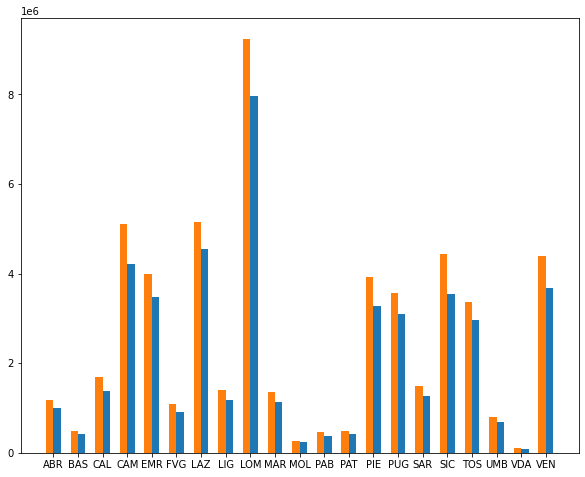

In [31]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()
ax.bar(vaccinati.index+0.15,vaccinati["prima_dose"],width=0.3)
ax.bar(abitanti.index-0.15,abitanti["totale_popolazione"],width=0.3)
plt.xticks(vaccinati.index, vaccinati["area"])
plt.show()

In [34]:
percentuale = vaccinati
percentuale

,area,prima_dose
0,ABR,991170
1,BAS,428492
2,CAL,1378822
3,CAM,4223716
4,EMR,3472668
5,FVG,901748
6,LAZ,4541686
7,LIG,1185884
8,LOM,7971962
9,MAR,1132704


In [35]:
percentuale["totale_popolazione"] = abitanti["totale_popolazione"]
precentuale

,area,prima_dose,totale_popolazione
0,ABR,991170,1188922
1,BAS,428492,494881
2,CAL,1378822,1689716
3,CAM,4223716,5104347
4,EMR,3472668,3998406
5,FVG,901748,1088152
6,LAZ,4541686,5147533
7,LIG,1185884,1399466
8,LOM,7971962,9246804
9,MAR,1132704,1366477


In [44]:
precentuale["percentuale"]  = precentuale["prima_dose"] / precentuale["totale_popolazione"] * 100
precentuale

,area,prima_dose,totale_popolazione,percentuale
0,ABR,991170,1188922,83.367117
1,BAS,428492,494881,86.584856
2,CAL,1378822,1689716,81.600813
3,CAM,4223716,5104347,82.747431
4,EMR,3472668,3998406,86.851310
5,FVG,901748,1088152,82.869673
6,LAZ,4541686,5147533,88.230343
7,LIG,1185884,1399466,84.738322
8,LOM,7971962,9246804,86.213161
9,MAR,1132704,1366477,82.892284


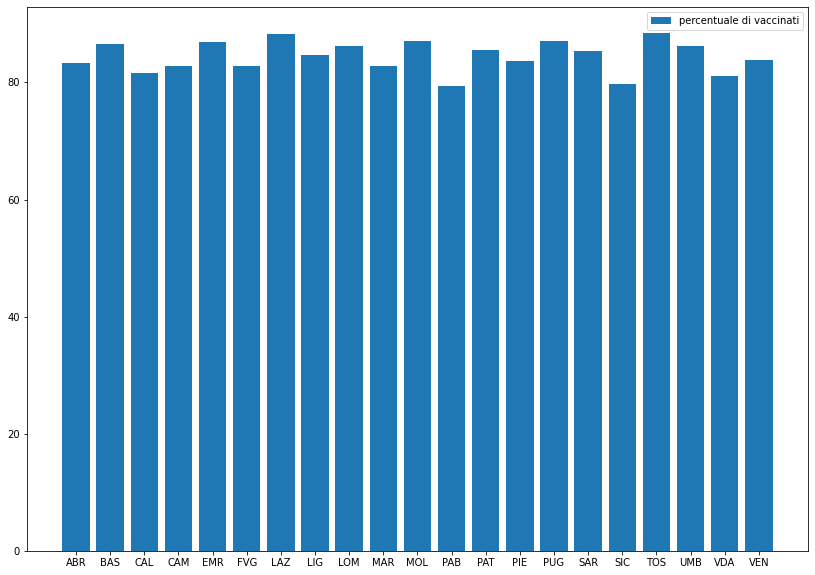

In [54]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes()
ax.bar(percentuale["area"],percentuale["percentuale"], label="percentuale di vaccinati")
plt.legend(loc = 1)
plt.show()

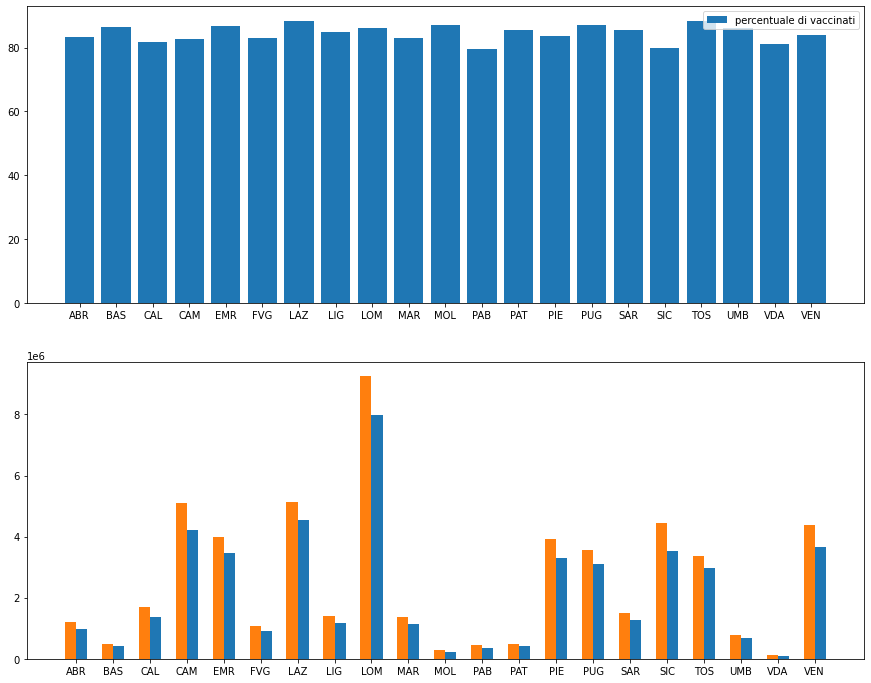

In [82]:
fig, (ax, ax1) = plt.subplots(2, figsize= (15,12))
ax.bar(percentuale["area"],percentuale["percentuale"], label="percentuale di vaccinati")
ax.legend(loc=1)
ax1.bar(vaccinati.index+0.15,vaccinati["prima_dose"],width=0.3)
ax1.bar(abitanti.index-0.15,abitanti["totale_popolazione"],width=0.3)
plt.xticks(vaccinati.index, vaccinati["area"])
plt.show()

In [84]:
fig.savefig("grafici.png")